In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import matplotlib

dataset_path = '/vision/group/EPIC-KITCHENS/'
annotations_foldername = 'annotations'
annotations_folderpath = os.path.join(dataset_path, annotations_foldername)
visual_dataset_path = os.path.join(dataset_path, 'EPIC_KITCHENS_2018')
visual_images_foldername = 'object_detection_images'
visual_images_folderpath = os.path.join(visual_dataset_path, visual_images_foldername)

# training data
training_action_labels = 'EPIC_train_action_labels.csv'
training_object_labels = 'EPIC_train_object_labels.csv'
train_action_csvpath = os.path.join(annotations_folderpath, training_action_labels)
train_object_csvpath = os.path.join(annotations_folderpath, training_object_labels)

class_key = 'EPIC_noun_classes.csv'
class_key_csvpath = os.path.join(annotations_folderpath, class_key)

assert os.path.exists(train_action_csvpath), "{} does not exist".format(train_action_csvpath)
assert os.path.exists(train_object_csvpath), "{} does not exist".format(train_object_csvpath)
assert os.path.exists(visual_images_folderpath), "{} does not exist".format(visual_images_folderpath)
assert os.path.exists(class_key_csvpath), "{} does not exist".format(class_key_csvpath)

action_df = pd.read_csv(train_action_csvpath)
object_df = pd.read_csv(train_object_csvpath)
class_key_df = pd.read_csv(class_key_csvpath)

In [13]:
action_df

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
5,5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0,container,29,['container'],[29]
6,6,P01,P01_01,take tofu,00:00:18.19,00:00:21.14,1091,1268,take,0,tofu,159,['tofu'],[159]
7,7,P01,P01_01,close fridge,00:00:21.91,00:00:23.33,1314,1399,close,3,fridge,10,['fridge'],[10]
8,8,P01,P01_01,open fridge,00:00:23.18,00:00:24.29,1390,1457,open,2,fridge,10,['fridge'],[10]
9,9,P01,P01_01,take carrots and,00:00:24.48,00:00:27.94,1468,1676,take,0,carrot,40,['carrot'],[40]


In [2]:
class_key_dict = dict(zip(class_key_df.class_key, class_key_df.noun_id))

In [3]:
class_key_dict

{'Nothing': 0,
 'pan': 1,
 'pan:dust': 2,
 'tap': 3,
 'plate': 4,
 'knife': 5,
 'bowl': 6,
 'spoon': 7,
 'cupboard': 8,
 'drawer': 9,
 'fridge': 10,
 'lid': 11,
 'hand': 12,
 'onion': 13,
 'onion:spring': 14,
 'pot': 15,
 'glass': 16,
 'water': 17,
 'fork': 18,
 'board:chopping': 19,
 'bag': 20,
 'sponge': 21,
 'spatula': 22,
 'cup': 23,
 'oil': 24,
 'bin': 25,
 'meat': 26,
 'potato': 27,
 'bottle': 28,
 'container': 29,
 'tomato': 30,
 'salt': 31,
 'cloth': 32,
 'sink': 33,
 'door:kitchen': 34,
 'pasta': 35,
 'dish:soap': 36,
 'food': 37,
 'kettle': 38,
 'box': 39,
 'carrot': 40,
 'sauce': 41,
 'colander': 42,
 'milk': 43,
 'rice': 44,
 'garlic': 45,
 'pepper': 46,
 'hob': 47,
 'dough': 48,
 'dishwasher': 49,
 'egg': 50,
 'cheese': 51,
 'bread': 52,
 'table': 53,
 'salad': 54,
 'microwave': 55,
 'oven': 56,
 'cooker:slow': 57,
 'coffee': 58,
 'filter': 59,
 'jar': 60,
 'rack:drying': 61,
 'chicken': 62,
 'tray': 63,
 'mixture': 64,
 'towel': 65,
 'towel:kitchen': 66,
 'peach': 67,
 's

In [6]:
hierarchy = {'vegetables': ['onion', 'potato', 'tomato', 'garlic', 'salad',
               'carrot', 'leaf', 'vegetable', 'lettuce', 'courgette',
               'mushroom', 'cucumber', 'squash', 'corn', 'aubergine', 
                'paste:garlic','avocado', 'leek', 'onion:spring', 'cabbage',
                'bean:green', 'celery', 'spinach', 'broccoli', 'pea', 'kale',
                'sprout', 'artichoke', 'asparagus'],
            'fruits_nuts': ['peach', 'olive', 'nut:pine', 'kiwi', 'banana', 
                            'lemon', 'lime', 'grape', 'blueberry', 'melon', 
                            'pear', 'raisin', 'coconut', 'apple', 'berry', 
                            'fruit', 'cherry', 'almond', 'pineapple'],
            'dairy_eggs': ['cheese', 'egg', 'milk', 'yoghurt', 'cream', 'butter'],
            'meat': ['meat', 'chicken', 'fish', 'sausage', 'bacon', 'burger:tuna',
                    'tuna', 'salami', 'salmon', 'beef', 'stick:crab', 'shrimp', 
                     'turkey'],
            'spices_herbs_sauces': ['sauce', 'spice', 'colander', 'pepper', 'salt', 
                                    'curry', 'ginger', 'chilli', 'pesto', 'oregano',
                                   'sugar', 'powder:coconut', 'parsley', 'basil',
                                   'seed', 'mint', 'coriander', 'thyme', 'dressing:salad',
                                   'paprika', 'leaf:mint', 'cumin', 'flake:chilli', 'grass:lemon',
                                   'caper', 'mayonnaise', 'herb', 'cinnamon', 'tahini', 'turmeric',
                                   'syrup', 'mustard', 'syrup', 'mustard', 'ketchup', 
                                    'pepper:cayenne', 'garni:bouquet'], 
            'liquids': ['oil', 'coffee', 'liquid', 'tea', 'water', 'vinegar', 'wine', 'smoothie', 
                        'juice', 'mocha', 'beer', 'nesquik', 'coke', 'drink'],
            'other ingredients': ['pasta', 'rice', 'skin', 'mixture', 'tofu', 'cereal', 
                                  'ingredient', 'honey', 'stock', 'noodle', 'oat', 'roll',
                                  'leftover', 'nutella', 'oatmeal', 'hummus', 'chip', 'dumpling',
                                  'ring:onion', 'breadcrumb', 'popcorn', 'butter:peanut', 
                                  'bar:cereal', 'chocolate', 'crisp'],
            'baked_baking': ['dough', 'bread', 'tortilla', 'pizza', 'flour', 
                             'biscuit', 'pie', 'quorn', 'yeast', 'cake', 'pancake', 'croissant',
                             'muffin'], #dough ball
            'cooked food': ['food', 'risotto', 'omelette', 'soup', 'sandwich', 'paella', 'fishcakes',
                           'mat:sushi'],
            'packaging': ['package', 'bag', 'wrap', 'paper', 'foil', 'wrap:plastic', 'capsule', 
                          'scrap'],
            'containers': ['box', 'container', 'bottle', 'jar', 'jug', 'cover', 'can', 'basket',
                            'cap', 'support', 'backpack', 'cork', 'support', 'backpack', 'cork'],
            'cutlery': ['knife', 'spoon', 'spatula', 'fork', 'cutlery', 'chopstick', 'ladle'],
            'kitchenware': ['pan', 'plate', 'bowl', 'pot', 'cup', 'lid', 'board:chopping', 'glass',
                            'tray', 'filter', 'scissors', 'brush', 'peeler:potato', 'strainer', 
                            'utensil', 'tongs', 'pestle', 'mortar','grater','grinder', 'base', 
                            'pin:rolling', 'holder:filter', 'time', 'presser', 'timer', 'slicer', 
                            'clip', 'whetstone', 'cutter:pizza', 'juicer:lime',  'mesh', 'shaker:pepper', 
                           'squeezer:lime', 'rubber', 'opener:bottle', 'masher'],
            'appliances': ['tap', 'fridge', 'hob', 'oven', 'kettle', 'maker:coffee', 'dishwasher',
                            'microwave', 'machine:washing', 'processor:food', 'grill', 'freezer',
                          'scale', 'heater', 'cooker:slow', 'toaster', 'button', 'blender', 'heat', 
                          'plug', 'phone', 'watch', 'fan:extractor', 'flame', 'tab', 'wire', 
                           'control:remote', 'alarm', 'power', 'stereo', 'fire'],
            'furniture': ['cupboard', 'drawer', 'sink', 'top', 'rack:drying', 'table', 'kitchen',
                         'mat', 'shelf', 'floor', 'switch', 'chair', 'desk', 'candle', 'boiler', 'light',
                         'handle', 'knob', 'mouse', 'door:kitchen', 'rug', 'tablet', 'window', 'stand'],
            'fabric_clothes': ['cloth', 'clothes', 'glove:oven', 'towel', 'napkin', 'towel:kitchen', 
                               'tablecloth', 'shirt', 'apron', 'poster', 'tissue', 'label', 'boxer',
                              'guard:hand', 'sock', 'sticker', 'trousers', 'sleeve', 'sheets'],
            'trash': ['bin', 'rubbish', 'shell:egg', 'sponge', 'liquid:washing', 'soap', 'powder:washing',
                     'spot', 'pan:dust'],
            'human': ['finger'],
            'uncategorized': ['content', 'rest', 'part', 'form', 'supplement', 'dust', 'instruction', 
                              'recipe', 'air']}

def extend_all(l):
    a = []
    for i in l:
        a.extend(i)
    return a

for element in extend_all(hierarchy.values()):
    assert element in class_key_dict, "{} not in class_key_dict".format(element)
    

In [92]:
# Saving the hierarchy
!pwd

/vision2/u/ianhuang/VidObjClassHierarchy/viz/viz_data


In [7]:
hierarchy.keys()

dict_keys(['vegetables', 'fruits_nuts', 'dairy_eggs', 'meat', 'spices_herbs_sauces', 'liquids', 'other ingredients', 'baked_baking', 'cooked food', 'packaging', 'containers', 'cutlery', 'kitchenware', 'appliances', 'furniture', 'fabric_clothes', 'trash', 'human', 'uncategorized'])

In [48]:
print(set(extend_all(hierarchy.values())) - set(class_key_dict.keys()))
print(set(class_key_dict.keys()) - set(extend_all(hierarchy.values())))

set()
{'slipper', 'hand', 'gravy', 'trouser', 'hat', 'wall', 'lighter', 'tube', 'alcohol', 'straw', 'pith', 'rim', 'cd', 'waffle', 'Nothing', 'dish:soap', 'tail', 'rosemary', 'driver:screw', 'jambalaya', 'ball', 'ladder', 'remover:spot', 'heart', 'casserole', 'envelope', 'lamp', 'funnel', 'lead', 'tarragon', 'whisk', 'book', 'rinse'}


In [10]:
# slipper -> fabric_clothes
hierarchy['fabric_clothes'].append('slipper')
# hand -> human
hierarchy['human'].append('hand')
# gravy -> spices_herbs_sauces
hierarchy['spices_herbs_sauces'].append('gravy')
# trouser -> fabric_clothes
hierarchy['fabric_clothes'].append('trouser')
# hat -> fabric_clothes
hierarchy['fabric_clothes'].append('hat')
# wall -> furniture
hierarchy['furniture'].append('wall')
# lighter -> appliances
hierarchy['appliances'].append('lighter')
# tube -> appliances
hierarchy['appliances'].append('tube')
# alcohol -> liquids
hierarchy['liquids'].append('alcohol')
# straw -> appliances
hierarchy['appliances'].append('straw')
# pith -> trash
hierarchy['trash'].append('pith')
# rim -> uncategorized
hierarchy['uncategorized'].append('rim')
# cd -> uncategorized
hierarchy['uncategorized'].append('cd')
# waffle -> baked_baking
hierarchy['baked_baking'].append('waffle')
# Nothing -> uncategorized
hierarchy['uncategorized'].append('Nothing')
# dish:soap -> appliances 
hierarchy['appliances'].append('dish:soap')
# tail -> uncategorized
hierarchy['uncategorized'].append('tail')
# rosemary -> spices_herbs_sauce
hierarchy['spices_herbs_sauces'].append('rosemary')
# driver:screw -> appliances
hierarchy['appliances'].append('driver:screw')
# jambalaya -> cooked_food 
hierarchy['cooked food'].append('jambalaya')
# ball -> uncategorized
hierarchy['uncategorized'].append('ball')
# ladder -> appliance
hierarchy['appliances'].append('ladder')
# remover:spot -> appliance
hierarchy['appliances'].append('remover:spot')
# heart -> uncategorized
hierarchy['uncategorized'].append('heart')
# casserole -> cooked food
hierarchy['cooked food'].append('casserole')
# envelope -> uncategorized
hierarchy['uncategorized'].append('envelope')
# lamp -> furniture 
hierarchy['furniture'].append('lamp')
# funnel -> appliance
hierarchy['appliances'].append('funnel')
# lead -> uncategorized
hierarchy['uncategorized'].append('lead')
# tarragon -> spices_herbs_sauce
hierarchy['spices_herbs_sauces'].append('tarragon')
# whisk -> appliance
hierarchy['appliances'].append('whisk')
# book -> uncategorized
hierarchy['uncategorized'].append('book')
# rinse -> appliance
hierarchy['appliances'].append('rinse')

In [11]:
print(set(extend_all(hierarchy.values())) - set(class_key_dict.keys()))
print(set(class_key_dict.keys()) - set(extend_all(hierarchy.values())))

set()
set()


In [38]:
foo = action_df.loc[(action_df['noun']=='onion')]
for a, b in (foo['verb'].value_counts()).iteritems():
    print(a,b)

cut 76
peel 67
chop 66
stir 57
put 52
pick-up 42
slice 37
take 31
put-down 19
move 18
throw 9
dice 8
pour 7
mix 5
scrape 4
grab 4
sprinkle 4
remove 3
inspect 3
halve 2
spread 2
place 2
pour-in 2
split 2
wash 2
fetch 2
transfer 2
rinse 2
put-in 2
turn 1
tip 1
measure 1
seal 1
clean 1
slice-off 1
push 1
add 1
slice-along 1
slide 1
decide-if 1
divide 1
slice-into 1
shake 1
slice-up 1
make 1


In [39]:
# for each category, find distributions of verbs used
action_list = list(set(action_df['verb']))

action_counts = {cat:{element: 0 for element in action_list} for cat in hierarchy}

for cat in hierarchy:
    for class_ in hierarchy[cat]:
        foo = action_df.loc[(action_df['noun'] == class_)]
        for verb, count in foo['verb'].value_counts().iteritems():
            action_counts[cat][verb] += count



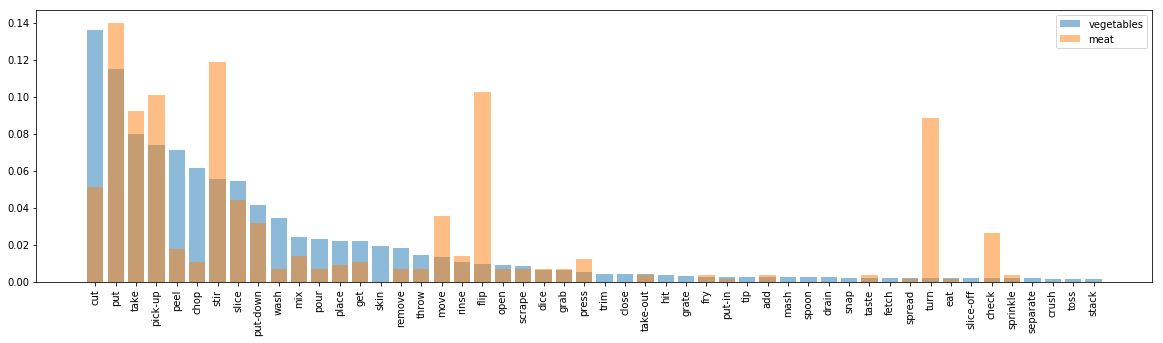

In [90]:
import numpy as np
import matplotlib.pyplot as plt

categories = [ 'vegetables', 'meat']
counts = [(action_counts[categories[0]][action], action) for action in action_list]
counts_sorted = sorted(counts, key=lambda x: x[0], reverse=True)
counts_sorted = counts_sorted[:50]

plt.figure(figsize=(20,5))
for cat in categories:
    counts = [action_counts[cat][element[1]] for element in counts_sorted]
    normalized_counts = [element/sum(counts) for element in counts]
    plt.xticks(rotation=90)
    plt.bar([element[1] for element in counts_sorted], normalized_counts, alpha=0.5, label=cat)
    
plt.legend()
    
#     rects1 = plt.bar(index, counts, bar_width, alpha=opacity,
#                      label=cat)
# ax.set_xticks(range(0,10,10/float(n_groups)))
# ax.set_xticklabels(action_list, rotation=45 )    
# plt.legend()
# plt.show()